# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
# Download otomatis dari repo publik
# !kaggle datasets download vuppalaadithyasairam/kidney-stone-prediction-based-on-urine-analysis
# !unzip -o kidney-stone-prediction-based-on-urine-analysis.zip
url = "kidney_stone_Raw.csv"
df = pd.read_csv(url)

# Lihat 5 baris pertama
print(df.head())

   gravity    ph  osmo  cond  urea  calc  target
0    1.021  4.91   725  14.0   443  2.45       0
1    1.017  5.74   577  20.0   296  4.49       0
2    1.008  7.20   321  14.9   101  2.36       0
3    1.011  5.51   408  12.6   224  2.15       0
4    1.005  6.52   187   7.5    91  1.16       0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Info Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  79 non-null     float64
 1   ph       79 non-null     float64
 2   osmo     79 non-null     int64  
 3   cond     79 non-null     float64
 4   urea     79 non-null     int64  
 5   calc     79 non-null     float64
 6   target   79 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 4.4 KB
None

Statistik Deskriptif:
         gravity         ph         osmo       cond        urea       calc  \
count  79.000000  79.000000    79.000000  79.000000   79.000000  79.000000   
mean    1.018114   6.028481   612.848101  20.813924  266.405063   4.138987   
std     0.007239   0.724307   237.514755   7.938994  131.254550   3.260051   
min     1.005000   4.760000   187.000000   5.100000   10.000000   0.170000   
25%     1.012000   5.530000   413.000000  14.150000  160.000000   1.460000   

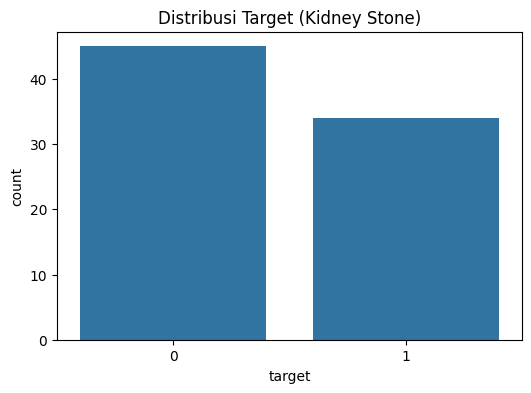

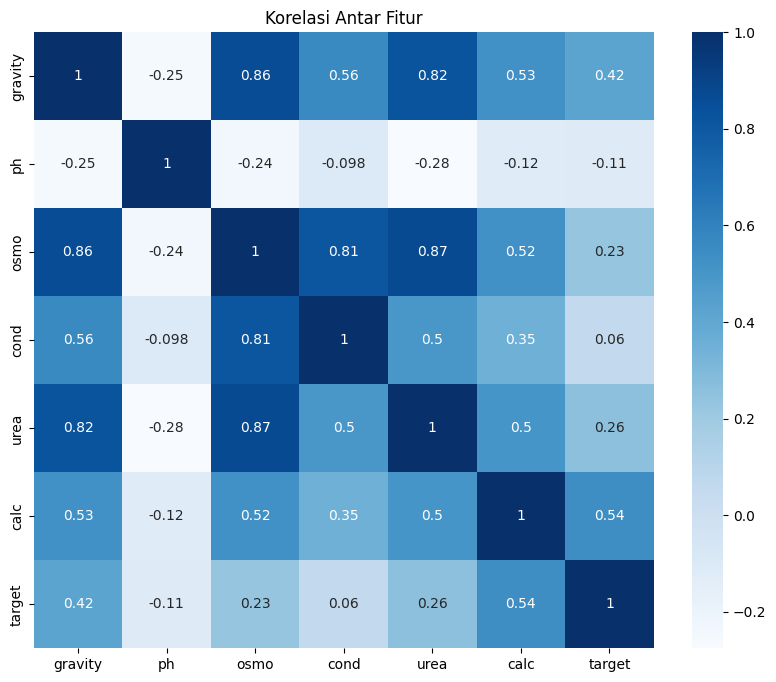

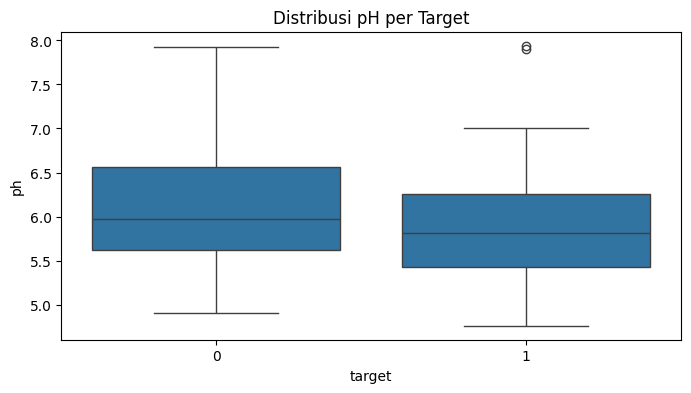

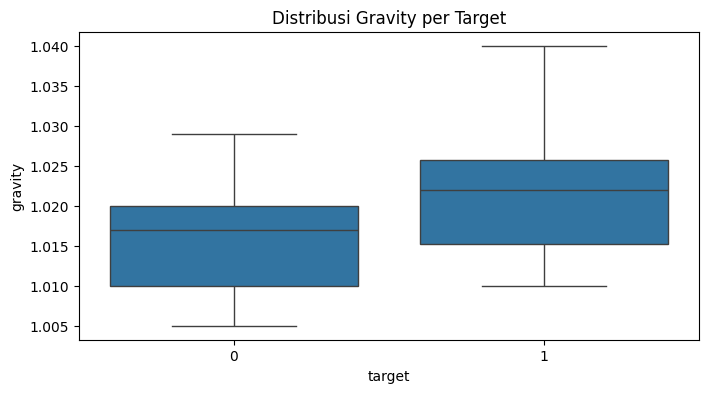

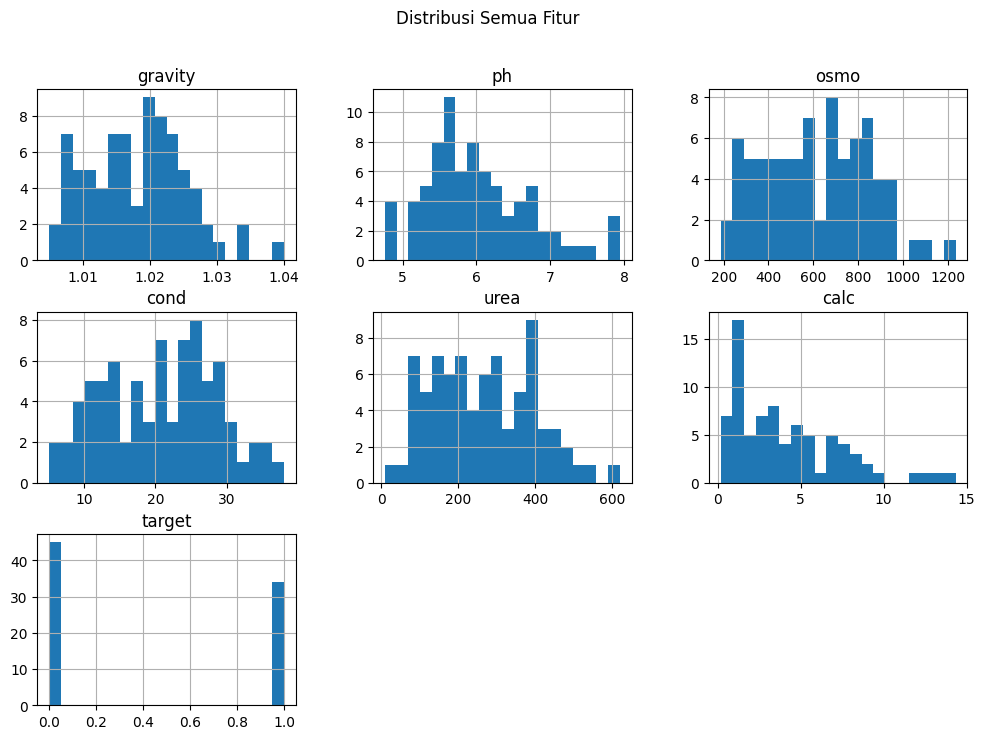

In [3]:
# Info dataset
print("Info Data:")
print(df.info())
print("\nStatistik Deskriptif:")
print(df.describe())

# Cek missing value
print("\nMissing Value per Kolom:")
print(df.isnull().sum())

# Distribusi kelas (quality)
print("\nDistribusi Target (target):")
print(df['target'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df)
plt.title("Distribusi Target (Kidney Stone)")
plt.show()

# Korelasi antar fitur
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title("Korelasi Antar Fitur")
plt.show()

# Visualisasi fitur utama
plt.figure(figsize=(8,4))
sns.boxplot(x='target', y='ph', data=df)
plt.title("Distribusi pH per Target")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x='target', y='gravity', data=df)
plt.title("Distribusi Gravity per Target")
plt.show()

df.hist(figsize=(12,8), bins=20)
plt.suptitle("Distribusi Semua Fitur")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [4]:
# 1. Hapus data duplikat
df = df.drop_duplicates()
print("Setelah hapus duplikat:", df.shape)

# 2. Tangani missing value
print("Missing value per kolom:\n", df.isnull().sum())
df = df.dropna()
print("Setelah hapus missing value:", df.shape)

# 3. Normalisasi fitur numerik
num_cols = df.select_dtypes(include=np.number).columns.drop('target')
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# 4. (Opsional) Deteksi outlier (misal Z-score > 3)
z_scores = np.abs((df[num_cols] - df[num_cols].mean()) / df[num_cols].std())
df = df[(z_scores < 3).all(axis=1)]
print("Setelah hapus outlier:", df.shape)

# 5. Simpan hasil preprocessing ke CSV baru
df.to_csv("kidney_stone_urine_analysis_preprocessing.csv", index=False)
print("Data hasil preprocessing telah disimpan ke kidney_stone_urine_analysis_preprocessing.csv")


Setelah hapus duplikat: (79, 7)
Missing value per kolom:
 gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64
Setelah hapus missing value: (79, 7)
Setelah hapus outlier: (77, 7)
Data hasil preprocessing telah disimpan ke kidney_stone_urine_analysis_preprocessing.csv
